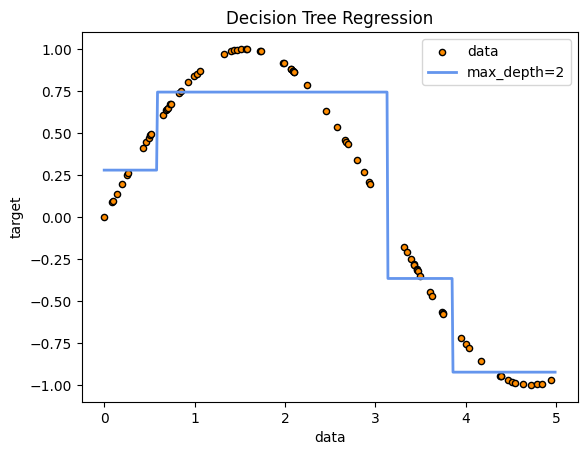

In [8]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
#y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

epoch 0, loss 0.035863589495420456
epoch 1, loss 0.02237790822982788
epoch 2, loss 0.04109308868646622
epoch 3, loss 0.04138245806097984
epoch 4, loss 0.052843280136585236
epoch 5, loss 0.016028445214033127
epoch 6, loss 0.007105338387191296
epoch 7, loss 0.0313866063952446
epoch 8, loss 0.005226403009146452
epoch 9, loss 0.004080825485289097
epoch 10, loss 0.02462715469300747
epoch 11, loss 0.00783713161945343
epoch 12, loss 0.015014003962278366
epoch 13, loss 0.03250252455472946
epoch 14, loss 0.014913360588252544
epoch 15, loss 0.04150712862610817
epoch 16, loss 0.03621082752943039
epoch 17, loss 0.011571702547371387
epoch 18, loss 0.020356465131044388
epoch 19, loss 0.02144131436944008
epoch 20, loss 0.010599493980407715
epoch 21, loss 0.01015111617743969
epoch 22, loss 0.004469180013984442
epoch 23, loss 0.006860300898551941
epoch 24, loss 0.0053846510127186775
epoch 25, loss 0.005607714410871267
epoch 26, loss 0.017187800258398056
epoch 27, loss 0.02374465949833393
epoch 28, loss

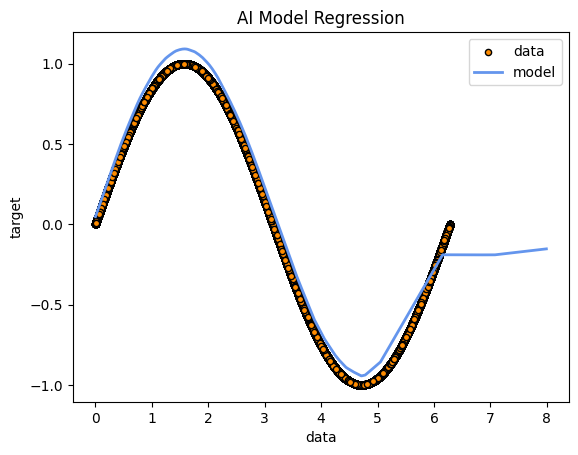

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, 1),
        )
    
    def forward(self, x):
        out = self.model(x)
        return out

# Create a random dataset
rng = np.random.RandomState(1)
X = np.random.rand(10**5) * 2 * np.pi
y = np.sin(X).ravel()

X_train, X_val, y_train, y_val = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)

model = LinearModel(1, 512)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(50):
    for X_train, y_train in train_dataloader:
        X_train = X_train.type(torch.float32)
        y_train = y_train.type(torch.float32)
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))
        
X_test = np.arange(0.0, 8.0, 0.01)[:, np.newaxis]
y_1 = model(torch.from_numpy(X_test).float()).detach().numpy()

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()